In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-50.717553038492504 -143.7809465821931
-74.67877406466755 169.24439945153858
-70.21610539716843 -106.50893306809466
23.28700287102602 -171.03575947145643
-26.260071093011568 -5.5638756500949
-77.73426031675383 141.55347662891842
11.951069732550451 -7.408644989910641
-2.3058990219966375 59.823465218569424
57.6268989187771 104.82554983603694
-9.576709772566147 92.46903196350138
53.32029315695689 18.348832673197137
-48.59720632854963 -107.76759185257735
8.151221439482214 93.81602580041113
-83.25453755233852 -84.54987923388065
-66.38487952831923 166.0223416851013
-36.11027099254186 44.20135057842049
-11.388037716682518 150.0371504416513
25.441333834288898 -113.88114175637233
29.48988573339072 37.006209057375
6.448414218237133 83.22271678201832
59.95364999097009 133.0894789776824
28.34426162755456 93.31373722941589
79.79894253831046 -64.82530122714022
-80.23016588233381 150.73398361868163
77.78784013975402 -78.49757025291983
-56.24759291438887 -163.92646107221682
3.88732474080183 17.1075414

-8.860301287178558 13.92482635618714
55.6841589105982 -35.219970707789855
66.34562429019817 -129.07106083524866
-12.750650700276623 113.64994212969975
22.299346699827154 32.330589873951055
79.11209909772197 102.77469873881716
17.963098704306745 25.10342482344481
62.117646651487064 122.57336575926769
-18.459195757486 -149.15541765922578
-4.6293661459410345 -110.7740423997332
36.92276156419199 -61.99932889587507
-66.40868642713917 -145.20299120685053
47.79610282654593 -54.39606502520638
52.38629480610973 116.90633457913412
-47.060392151554936 48.45978731722613
-43.97284352024627 -124.35885174582681
7.6037176834785924 -163.3618944162596
29.02688667299381 174.85506251718385
-88.93162774925158 65.40359957585852
-74.80593360525388 -89.17369063290053
57.17434685364671 69.34977708696681
27.301774266001047 175.3114795687012
59.53373460610473 -64.62769989622015
-77.85564578761401 -103.71650946287869
-66.80212748787092 -135.6446013819472
-71.57499353937077 -14.352579112151801
-9.345758468212665 -

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b10d7ecfaa59b138e52388d7eb940ac


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | bougouni
Processing Record 8 of Set 1 | victoria
Processing Record 9 of Set 1 | yantal
Processing Record 10 of Set 1 | bengkulu
Processing Record 11 of Set 1 | chelmno
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | sabang
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 16 of Set 1 | samarai
Processing Record 17 of Set 1 | constitucion
Processing Record 18 of Set 1 | tabuk
Processing Record 19 of Set 1 | kalmunai
Processing Record 20 of Set 1 | amga
Processing Record 21 of Set 1 | ziro
Processing Record 22 of Set 1 | narsaq
Processing Record 23 of Set 1 | qaanaaq
P

Processing Record 39 of Set 4 | springfield
Processing Record 40 of Set 4 | tsabong
Processing Record 41 of Set 4 | nuzvid
Processing Record 42 of Set 4 | sept-iles
Processing Record 43 of Set 4 | athabasca
Processing Record 44 of Set 4 | banda aceh
Processing Record 45 of Set 4 | gaffney
Processing Record 46 of Set 4 | vega de alatorre
Processing Record 47 of Set 4 | sitka
Processing Record 48 of Set 4 | sola
Processing Record 49 of Set 4 | bathsheba
Processing Record 50 of Set 4 | manggar
Processing Record 1 of Set 5 | amparafaravola
Processing Record 2 of Set 5 | hofn
Processing Record 3 of Set 5 | mochudi
Processing Record 4 of Set 5 | havoysund
Processing Record 5 of Set 5 | temiscaming
Processing Record 6 of Set 5 | gondanglegi
Processing Record 7 of Set 5 | toftir
City not found. Skipping...
Processing Record 8 of Set 5 | araouane
Processing Record 9 of Set 5 | adrar
Processing Record 10 of Set 5 | nisia floresta
Processing Record 11 of Set 5 | wajir
Processing Record 12 of Set 

Processing Record 33 of Set 8 | srednekolymsk
Processing Record 34 of Set 8 | lalomanu
City not found. Skipping...
Processing Record 35 of Set 8 | little current
Processing Record 36 of Set 8 | bayir
Processing Record 37 of Set 8 | basco
Processing Record 38 of Set 8 | rio grande
Processing Record 39 of Set 8 | acari
Processing Record 40 of Set 8 | liberal
Processing Record 41 of Set 8 | paidha
Processing Record 42 of Set 8 | rach gia
Processing Record 43 of Set 8 | zhigansk
Processing Record 44 of Set 8 | leh
Processing Record 45 of Set 8 | atar
Processing Record 46 of Set 8 | kuytun
Processing Record 47 of Set 8 | mairi
Processing Record 48 of Set 8 | kaitangata
Processing Record 49 of Set 8 | bilma
Processing Record 50 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 1 of Set 9 | katobu
Processing Record 2 of Set 9 | moscow
Processing Record 3 of Set 9 | watertown
Processing Record 4 of Set 9 | satitoa
City not found. Skipping...
Processing Record 5 of Set 9 | ni

Processing Record 21 of Set 12 | bunia
Processing Record 22 of Set 12 | chernyshevskiy
Processing Record 23 of Set 12 | karaul
City not found. Skipping...
Processing Record 24 of Set 12 | saint-augustin
Processing Record 25 of Set 12 | poum
Processing Record 26 of Set 12 | huicheng
Processing Record 27 of Set 12 | ravar
Processing Record 28 of Set 12 | omboue
Processing Record 29 of Set 12 | pundaguitan
Processing Record 30 of Set 12 | lewiston
Processing Record 31 of Set 12 | waingapu
Processing Record 32 of Set 12 | cacapava do sul
Processing Record 33 of Set 12 | kultuk
Processing Record 34 of Set 12 | georgetown
Processing Record 35 of Set 12 | port-cartier
Processing Record 36 of Set 12 | santander jimenez
Processing Record 37 of Set 12 | morant bay
Processing Record 38 of Set 12 | yokaichi
Processing Record 39 of Set 12 | barry
Processing Record 40 of Set 12 | witu
Processing Record 41 of Set 12 | egvekinot
Processing Record 42 of Set 12 | lebu
Processing Record 43 of Set 12 | gr

In [12]:
city_data.len()

AttributeError: 'list' object has no attribute 'len'

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,25.41,95,5,1.45,NZ,2022-08-09 19:14:40
1,Bluff,-46.6000,168.3333,36.90,79,5,2.95,NZ,2022-08-09 19:14:40
2,Punta Arenas,-53.1500,-70.9167,41.11,87,75,8.05,CL,2022-08-09 19:10:57
3,Kapaa,22.0752,-159.3190,80.58,79,75,11.50,US,2022-08-09 19:14:41
4,Jamestown,42.0970,-79.2353,73.02,62,100,8.05,US,2022-08-09 19:10:58
5,Hobart,-42.8794,147.3294,38.05,92,0,4.61,AU,2022-08-09 19:10:09
6,Bougouni,11.4170,-7.4790,75.13,93,100,7.29,ML,2022-08-09 19:14:42
7,Victoria,22.2855,114.1577,82.45,92,100,17.00,HK,2022-08-09 19:13:55
8,Yantal,56.8471,105.2542,52.11,78,37,2.62,RU,2022-08-09 19:14:43
9,Bengkulu,-3.8004,102.2655,74.77,91,33,4.61,ID,2022-08-09 19:14:43


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-08-09 19:14:40,-46.1927,168.8643,25.41,95,5,1.45
1,Bluff,NZ,2022-08-09 19:14:40,-46.6000,168.3333,36.90,79,5,2.95
2,Punta Arenas,CL,2022-08-09 19:10:57,-53.1500,-70.9167,41.11,87,75,8.05
3,Kapaa,US,2022-08-09 19:14:41,22.0752,-159.3190,80.58,79,75,11.50
4,Jamestown,US,2022-08-09 19:10:58,42.0970,-79.2353,73.02,62,100,8.05
5,Hobart,AU,2022-08-09 19:10:09,-42.8794,147.3294,38.05,92,0,4.61
6,Bougouni,ML,2022-08-09 19:14:42,11.4170,-7.4790,75.13,93,100,7.29
7,Victoria,HK,2022-08-09 19:13:55,22.2855,114.1577,82.45,92,100,17.00
8,Yantal,RU,2022-08-09 19:14:43,56.8471,105.2542,52.11,78,37,2.62
9,Bengkulu,ID,2022-08-09 19:14:43,-3.8004,102.2655,74.77,91,33,4.61


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

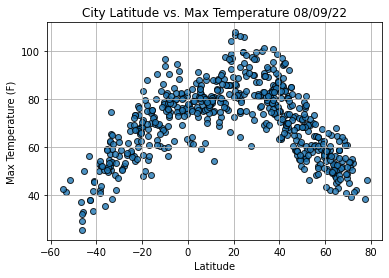

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

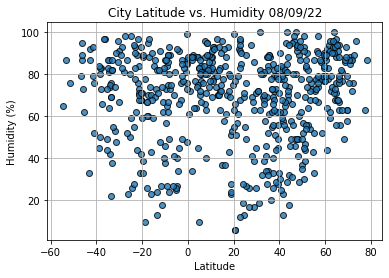

In [26]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

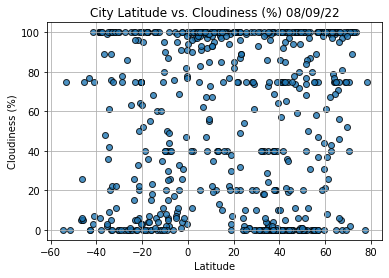

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

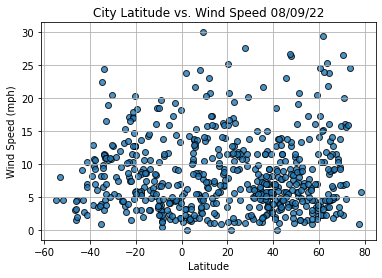

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()